### Imports

In [2]:
import pandas as pd
import numpy as np
import random
import math

### X

In [3]:
X = np.random.randint(1, 200, 10)
X

array([136, 184,  28,  37, 170, 157,  63, 173,  45,  76])

### Weights

In [4]:
y = np.random.randint(1, 40000, 10)
y

array([27314, 36973, 39494, 12093,  5392,   149, 15540, 25545, 30280,
       10645])

### Scaling weights to [-1, 1]

In [5]:
# Min Max Scaling
y_min, y_max = y.min(), y.max()
weights = 2 * (y-y_min)/(y_max-y_min)-1
weights

array([ 0.38086161,  0.87185157,  1.        , -0.39285805, -0.73348583,
       -1.        , -0.21763884,  0.29093913,  0.53163045, -0.46646334])

### Bias

In [6]:
b = random.uniform(-1, 1)
b

-0.8045342363992638

### Activation Function

In [7]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

### Dot Product / Feed Forward

In [8]:
# weighted sum = w1*x1+w2*x2 ... + b
z = sigmoid(np.dot(X, weights)+b)
z

1.6729100881380563e-14

### Activation for Prediction

In [9]:
def activation(z):
    return 1 if z>0.5 else 0

### Training

In [10]:
y_pred = activation(z)
error = weights - y_pred
error

array([ 0.38086161,  0.87185157,  1.        , -0.39285805, -0.73348583,
       -1.        , -0.21763884,  0.29093913,  0.53163045, -0.46646334])

In [11]:
lr = 0.1
w_new = []
for wi, xi in zip(weights, X):
    w_new.append(wi+lr*error*xi)
b_new = b + lr*error
len(w_new), b

(10, -0.8045342363992638)

Where Ir is the learning rate and we set its value to 0.1 but it could another value depending on the problem.

Hence, we now have updated weights the we would repeat the feed forward step for a number of epochs. By repeatedly adjusting the weights and biases based on the gradients, the network gradually learns to make better predictions, reducing the error over time. That step is also known as backpropagation

### Applying to the iris Dataset

In [47]:
class Perceptron():
    def __init__(self,input_size=2, lr=0.01, epochs=20):
        self.lr = lr
        self.epochs = epochs
        self.input_size = input_size
        self.w = np.random.uniform(-1, 1, size=(input_size))
        self.bias = random.uniform(-1, 1)
        self.misses = []
    def predict(self, x):
        w = self.w
        b = self.bias
        z = sigmoid(np.dot(w, x)+b)
        return 1 if z>0.5 else 0
    def fit(self, X, y):
        for i in range(self.epochs):
            miss = 0
            for yi, xi in zip(y, X):
                y_pred = self.predict(xi)
                error = yi - y_pred
                self.w += self.lr*error*xi
                self.bias += self.lr*error
                miss += int(error!=0.0)
            self.misses.append(miss)

In [48]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, y, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2


In [49]:
X = X[:100, [0,2]]
y = y[y<2]

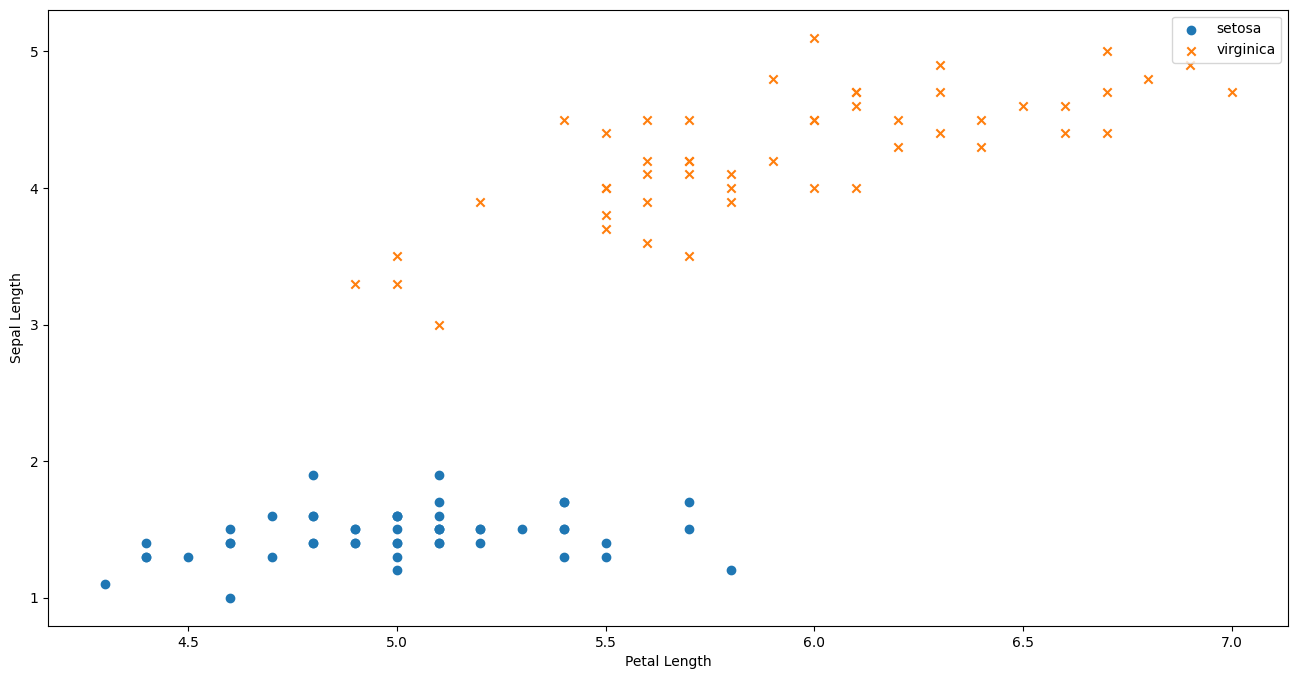

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.scatter(X[:50,0], X[:50, 1], marker='o', label='setosa')
plt.scatter(X[50:, 0] ,X[50:, 1], marker='x', label='virginica')
plt.ylabel('Sepal Length')
plt.xlabel('Petal Length')
plt.legend()
plt.show()

In [51]:
perceptron = Perceptron()
perceptron.fit(X, y)
print(perceptron.w, perceptron.bias)

[-0.06793207  0.2245295 ] -0.17383852181444015


In [52]:
test_pred = perceptron.predict([2.9, 5.1])
"Virginica" if test_pred==1 else "Setosa"

'Virginica'

### From GFG

In [53]:
X = iris.data[:100, :2]
y = iris.target[:100]
y = np.where(y==0, -1, 1) # convert labels to -1 and 1

weights = np.zeros(X.shape[1])
bias = 0
lr = 0.01
epochs = 500

In [54]:
class Perceptron2():
    def fit(X, y, weights, bias, lr, epochs):
        for epoch in range(epochs):
            for idx, xi in enumerate(X):
                linear_output = np.dot(xi, weights) + bias
                # Activation Function
                y_pred = np.where(linear_output>=0, 1, -1)
                # Update Weights
                # error = y[idx]-y_pred => actual-predicted
                update += lr*(y[idx]-y_pred)
                weights += update*xi
                bias += update
        return weights, bias
    def predict(X, weights, bias):
        linear_output = np.dot(X, weights)+bias
        return np.where(linear_output>=0, 1, -1)
    def plot(self,X, y, weights,bias):
        # x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        # y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        # xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        # Z = predict(np.c_[xx.ravel(), yy.ravel()], weights, bias)
        # Z = Z.reshape(xx.shape)
        # plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
        plt.show()


In [57]:
perceptron2 = Perceptron2()
weights, bias = perceptron2.fit(X, y, weights, bias, lr, epochs)
weights, bias

TypeError: Perceptron2.fit() takes 6 positional arguments but 7 were given

In [58]:
# Predictions
y_pred = perceptron2.predict(X, weights, bias)

TypeError: Perceptron2.predict() takes 3 positional arguments but 4 were given

In [59]:
# Accuracy
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 0.00%
